In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_sample_images

1/1 [==============================] - 0s 56ms/step


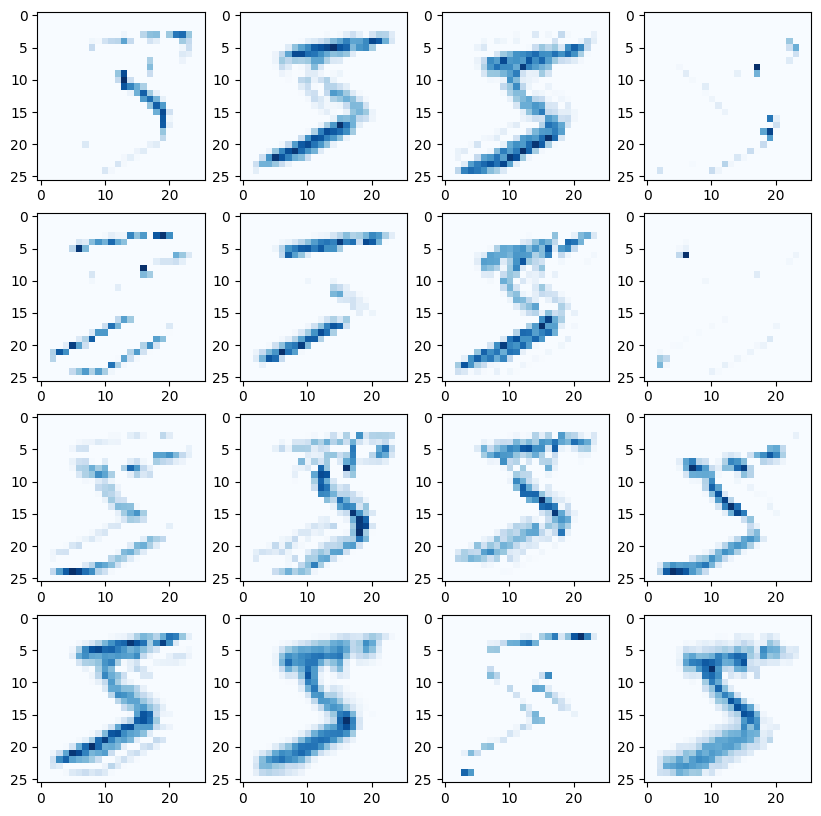

In [23]:

(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
img = x_train[0]
img = img.reshape((1, img.shape[0], img.shape[1], 1))

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1))])
output = model.predict(img)

filters = output.shape[-1]
plt.figure(figsize=(10, 10))
for j in range(filters):
    plt.subplot(4, 4, j+1)
    plt.imshow(output[0, :, :, j], cmap='Blues')
plt.show()

In [11]:
images = load_sample_images()["images"]
images = tf.keras.layers.CenterCrop(height=70, width=120)(images)
images = tf.keras.layers.Rescaling(scale=1 / 255)(images)

In [16]:
tf.random.set_seed(40)

In [17]:
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7)
fmaps = conv_layer(images)

In [18]:
images.shape, fmaps.shape

(TensorShape([2, 70, 120, 3]), TensorShape([2, 64, 114, 32]))

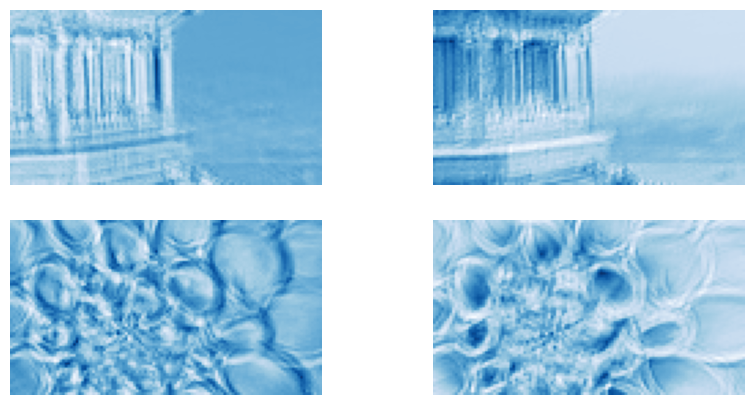

In [22]:
plt.figure(figsize=(10, 5))
for image_idx in (0, 1):
    for fmap_idx in (0, 1):
        plt.subplot(2, 2, image_idx * 2 + fmap_idx + 1)
        plt.imshow(fmaps[image_idx, :, :, fmap_idx], cmap="Blues")
        plt.axis("off")

plt.show()

In [24]:


conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7, padding="same")
fmaps = conv_layer(images)

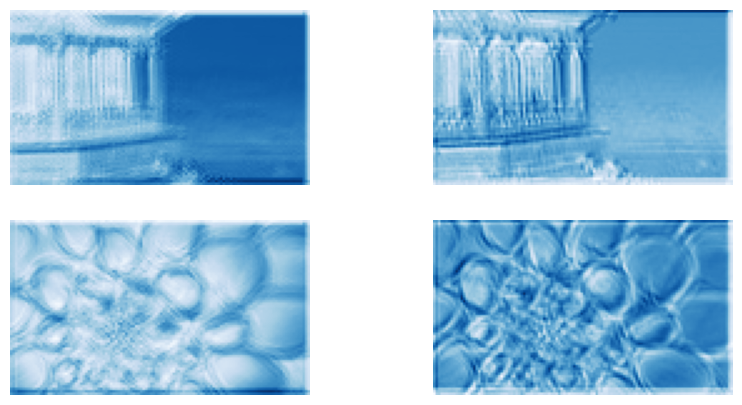

In [26]:
plt.figure(figsize=(10, 5))
for image_idx in (0, 1):
    for fmap_idx in (0, 1):
        plt.subplot(2, 2, image_idx * 2 + fmap_idx + 1)
        plt.imshow(fmaps[image_idx, :, :, fmap_idx], cmap="Blues")
        plt.axis("off")

plt.show()

In [27]:
kernels, biases = conv_layer.get_weights()
kernels.shape, biases.shape

((7, 7, 3, 32), (32,))

In [28]:
filters = np.zeros([7, 7, 3, 2])

filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1
biases = tf.zeros([2])

fmaps = tf.nn.conv2d(images, filters, strides=1, padding="SAME") + biases

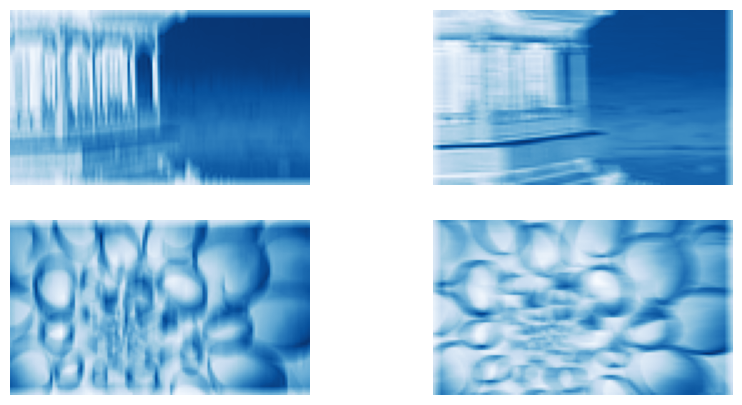

In [30]:
plt.figure(figsize=(10, 5))

for image_idx in (0, 1):
    for fmap_idx in (0, 1):
        plt.subplot(2, 2, image_idx * 2 + fmap_idx + 1)
        plt.imshow(fmaps[image_idx, :, :, fmap_idx], cmap="Blues")
        plt.axis("off")

plt.show()

In [31]:
fmaps = np.random.rand(2, 70, 120, 60)

output = tf.nn.max_pool(fmaps, ksize=(1, 1, 1, 3), strides=(1, 1, 1, 3), padding="VALID")
output.shape

TensorShape([2, 70, 120, 20])

In [32]:
class DepthPool(tf.keras.layers.Layer):
  def __init__(self, pool_size=5, **kwargs):
    super().__init__(**kwargs)
    self.pool_size = pool_size
  
  def call(self, inputs):
    shape = tf.shape(inputs)  
    groups = shape[-1] // self.pool_size  
    new_shape = tf.concat([shape[:-1], [groups, self.pool_size]], axis=0)
    return tf.reduce_max(tf.reshape(inputs, new_shape), axis=-1)

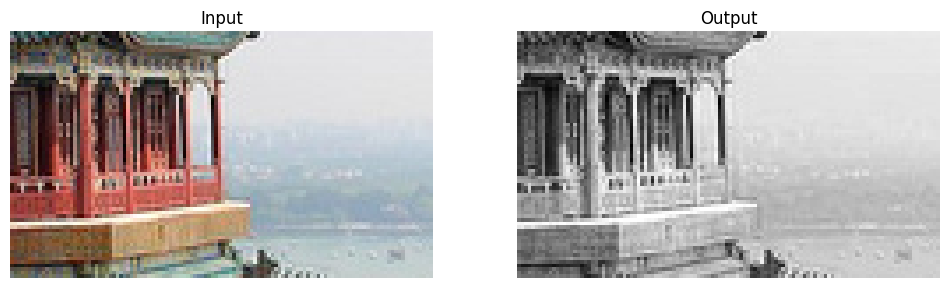

In [33]:
depth_output = DepthPool(pool_size=3)(images)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title("Input")
plt.imshow(images[0])
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Output")
plt.imshow(depth_output[0, ..., 0], cmap="gray")
plt.axis("off")
plt.show()